<h3 style="color:red;text-align:center;">Python pour le programme de Terminale
</h3>
<p><br></p>
<div style="text-align:justify;">

<ol>
    <li style="padding-bottom:1em;"><a href="./pythonterm.ipynb" > La bibliothèque random </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm2.ipynb" > Simuler un processus aléatoire illustrant la détermination de la valeur d’une grandeur avec incertitudes types composées </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm3.ipynb" > Représenter, à l’aide d’un langage de programmation, l’évolution des quantités de matière des espèces en fonction du volume de solution titrante versé </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm4.ipynb" > Déterminer, à l’aide d’un langage de programmation, le taux d’avancement final d’une transformation, modélisée par la réaction d’un acide sur l’eau </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm5.ipynb" > Tracer, à l’aide d’un langage de programmation, le diagramme de distribution des espèces d’un couple acide-base de pKa donné </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm6.ipynb" > À l’aide d’un langage de programmation et à partir de données expérimentales, tracer l’évolution temporelle d’une concentration, d’une vitesse volumique d’apparition ou de disparition et tester une relation donnée entre la vitesse volumique de disparition et la concentration d’un réactif </a></li>
    <li style="padding-bottom:1em;"><a href="./pythonterm7.ipynb" > Exploiter, à l’aide d’un langage de programmation, des données astronomiques ou satellitaires pour tester les deuxième et troisième lois de Kepler </a></li>
</ol></div>

<h1 style="text-align:center;">7. Exploiter, à l’aide d’un langage de programmation, des données astronomiques ou satellitaires pour tester les deuxième et troisième lois de Kepler.</h1>

Il est possible d'utiliser des données astronomiques récupérées sur internet. Cependant, la bibliothèque python **jplephem** associée à la bibliothèque **de423** donne accès directement aux données des éphémérides du laboratoire JPL de la NASA. Pour les télécharger, il suffit d'utiliser les commandes **pip install --upgrade pip** (pour mettre à jour la commande pip) puis **pip install jplephem** pour la bibliothèque et **pip install de423** pour les données. L'utilisation de ces commandes varie en fonction de l'installation d epython mais dans la plupart des cas, il suffit de les taper dans le shell de votre IDE et d'attendre qu'elle soit terminée avant de taper la suivante. Attention de423 fait presque 40 MB.

On charge ensuite les bibliothèques utiles

In [1]:
import de423
from jplephem import Ephemeris
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import pi

D'autres bibliothèques permettent de créer des figures utiles pour l'enseignement de ces lois de Kepler (créer une figure afin d'illustrer le cours par exemple) mais ne sont pas nécessaires pour les élèves.

In [2]:
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%matplotlib notebook

L'accès aux données peut se faire à partir du module **Ephemeris** de la bibliothèque jplephem. L'objet qui sera utilisé est stocké dans une variable, ici **eph**.

In [4]:
eph = Ephemeris(de423)

Les différents corps présents dans cette base de donnée sont listés ci-dessous. Pour la Terre, on utilisera **earthmoon** qui donne la position et la vitesse du centre de gravité du système Terre-Lune. La position de tous ces corps est donnée à partir du centre de gravité du système solaire (donc le Soleil se déplace dans ce référentiel).

In [5]:
eph.names

('earthmoon',
 'jupiter',
 'librations',
 'mars',
 'mercury',
 'moon',
 'neptune',
 'nutations',
 'pluto',
 'saturn',
 'sun',
 'uranus',
 'venus')

On peut visualiser facilement les trajectoires des planètes autour du soleil en utilisant la méthode **position** qui prend comme argument le nom de l'objet et le numéro du jour dans le calendrier julien et qui renvoie les trois composantes de la position de l'objet sous forme d'une liste.

On peut ainsi balayer les jours sur une période afin de récupérer toutes le spositions successives et tracer la trajectoire. Ceci peut se faire pour l'ensemble des planètes du système solaire afin d'étudier la première loi de Kepler par exemple.

La méthode **position_and_velocity** permet quand à elle d'obtenir la position et la vitesse du corps considéré. Les positions sont données en km et les vitesses en km/jour.

<IPython.core.display.Javascript object>


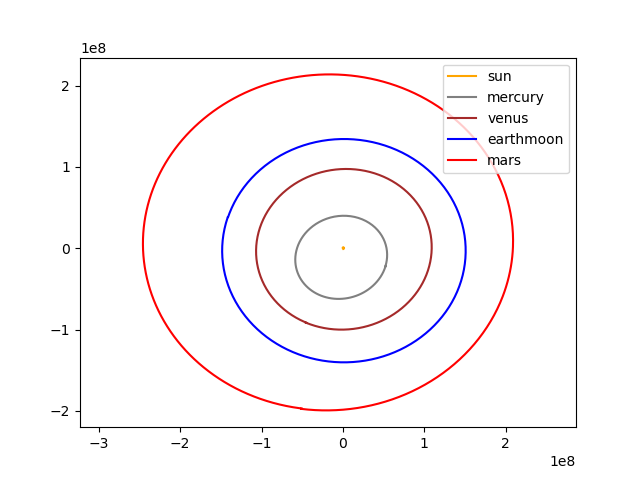

In [6]:
fig = plt.figure("système solaire interne")
# objets internes
objets = ["sun","mercury","venus","earthmoon","mars"]
couleurs = ["orange","gray","brown","blue","red"]
periodes = [5000,89,226,366,688]    # Le soleil se déplace par rapport au centre de gravité du système solaire. 
                                    # On peut le visualiser aven utilisant une période assez longue
for j in range(len(objets)):
    x = []
    y = []
    for i in range(2378556,2378556+periodes[j],1): #1er mars 1800 à 1er mars 1800 + période
        a,b,c = eph.position(objets[j],i) # Position de la planète sur les axes x, y et z
        x.append(a) 
        y.append(b)   
    plt.plot(x,y,color=couleurs[j],label = objets[j]) # On ne trace ici que le projeté des trajectoires sur un plan
plt.axis("equal") # Repère orthonormé pour visualiser des trajectoires non déformées par les échelles
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


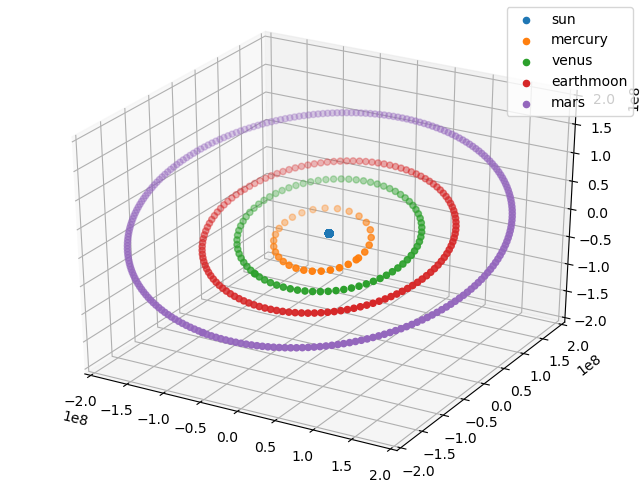

In [7]:
fig = plt.figure("système solaire interne 3D")
ax = Axes3D(fig)
# objets internes
objets = ["sun","mercury","venus","earthmoon","mars"]
couleurs = ["orange","gray","brown","blue","red"]
periodes = [5000,89,226,366,688]
for j in range(len(objets)):
    x = []
    y = []
    z = []
    for i in range(2378556,2378556+periodes[j],3): #1er mars 1800 à 1er mars 1800 + période
        a,b,c = eph.position(objets[j],i) # Position de la planète sur les axes x, y et z
        x.append(a) 
        y.append(b)
        z.append(c)
    ax.scatter(x, y, z,label = objets[j]) # La même chose en 3 dimensions
#plt.axis("equal") # Repère orthonormé pour visualiser des trajectoires non déformées
ax.set_xlim3d([-2e8,2e8])
ax.set_ylim3d([-2e8,2e8])
ax.set_zlim3d([-2e8,2e8])
plt.legend()
plt.show()

On peut faire la même chose pour le système solaire externe (4 planètes plus pluton interessante car sa trajectoire est bien elliptique et elle est inclinée par rapport au plan de l'écliptique) mais en utilisant une base de temps un peu plus longue.

<IPython.core.display.Javascript object>


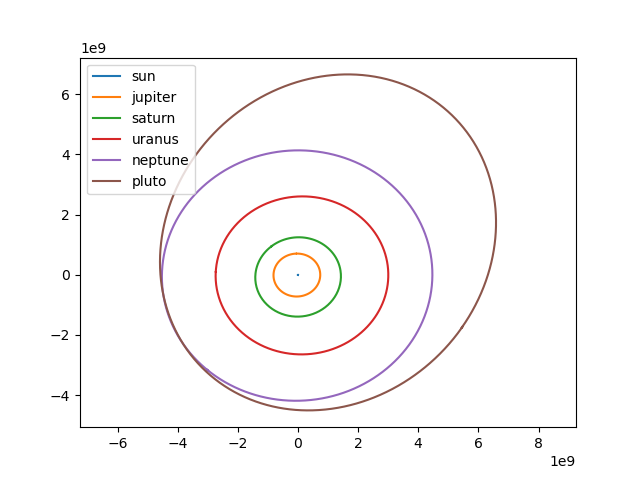

In [8]:
fig = plt.figure("système solaire externe")
# système solaire externe
objets = ["sun","jupiter","saturn","uranus","neptune","pluto"]
periodes = [90638,4333,10759,30685,60266,90638] # La période pour le soleil peut être modifiée en fonction des besoins

for j in range(len(objets)):
    x = []
    y = []
    for i in range(2378556,2378556+periodes[j],50): #1er mars 1800 à 1er mars 1800 + période
        a,b,c = eph.position(objets[j],i)
        x.append(a)
        y.append(b)
    plt.plot(x,y, label = objets[j]) # Trajectoires projetées dans un plan

plt.axis("equal")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


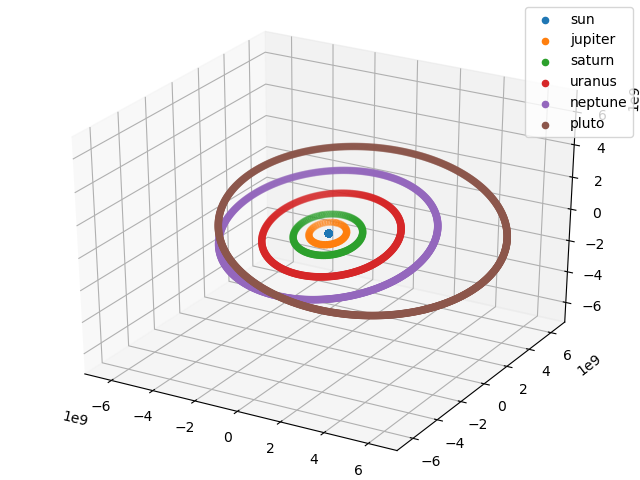

In [9]:
fig = plt.figure("système solaire externe 3D")
ax = Axes3D(fig)

# système solaire externe
objets = ["sun","jupiter","saturn","uranus","neptune","pluto"]
periodes = [90638,4333,10759,30685,60266,90638]
for j in range(len(objets)):
    x = []
    y = []
    z = []
    for i in range(2378556,2378556+periodes[j],100): #1er mars 1800 à 1er mars 1800 + période
        a,b,c = eph.position(objets[j],i) # Position de la planète sur les axes x, y et z
        x.append(a) 
        y.append(b)
        z.append(c)
    ax.scatter(x,y,z,label = objets[j]) # trajectoires en 3D

ax.set_xlim3d([-7e9,7e9])
ax.set_ylim3d([-7e9,7e9])
ax.set_zlim3d([-7e9,7e9])
plt.legend()
plt.show()

# Exercice
1. Utiliser des morceaux des codes proposés ci-dessus puis les modifier afin de tracer sur une même figure le mouvement des 8 planètes du système solaire sur une durée de 80 jours.

In [ ]:
# question 1


Nous allons maintenant passer à la deuxième loi de Kepler ou loi des aires. Il est possible de concevoir une figure pour laquelle les secteurs angulaires balayés sont visibles. On utilise pour cela la fonction **Polygon**. On utilise ici l'exemple de Mercure car l'orbite est assez élliptique pour que cela soit parlant.

<IPython.core.display.Javascript object>


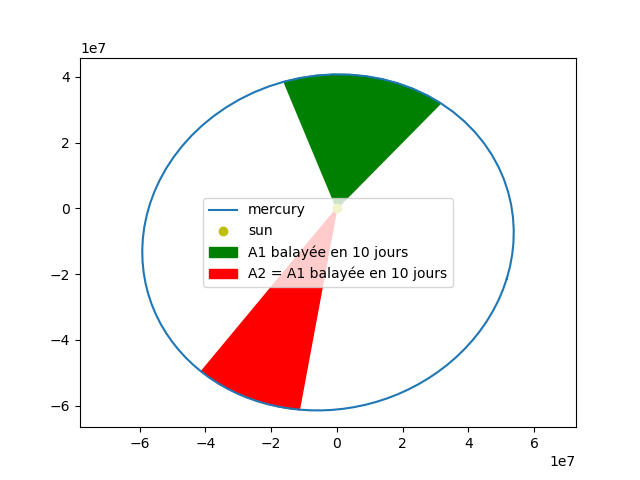

In [10]:
fig = plt.figure("Deuxième loi de Kepler: cas de Mercure")

o = "mercury" # nom de l'objet
p = 89 # période

x = []
y = []
for i in range(2378556,2378556+p,1): #1er mars 1800 à 1er mars 1800 + période
    a,b,c = eph.position(o,i)
    d,e,f = eph.position("sun",i)
    x.append(a-d) # On replace le soleil à l'origine du repère car les lois de Kepler sont définies par rapport au soleil
    y.append(b-e)

plt.plot(x,y,label = o) # Trajectoire de Mercure
plt.plot([0],[0],"oy",label="sun") # Soleil en (0,0) immobile ici

# On va tracer les deux secteurs balayés par le rayon de l'orbite
duree = 10 # pour une durée de 10 jours ici dans les deux cas
debut1 = 15 # premier secteur démarrant au jour 15
debut2 = 55 # le deuxième au jour 55

coord = [(0,0)] # Il faut une liste de points, Polygon tracera le polygone fermé reliant ces différants points.
                # On démarre par le soleil en (0,0)
for i in range(debut1,debut1+duree+1):
    coord.append((x[i],y[i])) # Puis la position de la planète chaque jour pendant 10 jours
plt.gca().add_patch(Polygon(coord,color="green",label='A1 balayée en {} jours'.format(duree))) # On ajoute la figure obtenue à la courbe

coord2 = [(0,0)] # meme chose pour le deuxième secteur
for i in range(debut2,debut2+duree+1): 
    coord2.append((x[i],y[i]))
plt.gca().add_patch(Polygon(coord2,color="red", label ='A2 = A1 balayée en {} jours'.format(duree)))

plt.axis("equal")
plt.legend()
plt.show()

# Exercice
2. Copier puis modfier le programme précédent afin de tracer les aires à partir du jour 10 et du jour 50 pour une durée de 7 jours.
3. Copier puis modifier le programme précédent afin de tracer ces aires sur la trajectoire de la Terre

In [ ]:
# question 2


In [20]:
# question 3


On peut aussi visualiser l'évolution de la vitesse de la planète en fonction de sa distance au Soleil de manière qualitative en positionnant des croix à intervalle de temps régulier sur la trajectoire.

<IPython.core.display.Javascript object>


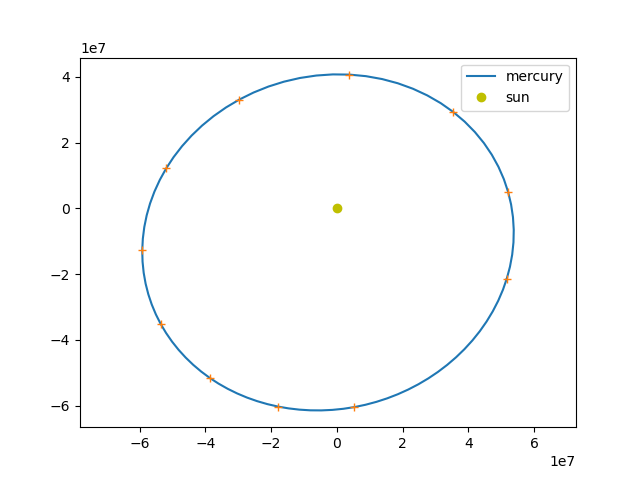

In [11]:
fig = plt.figure("Deuxième loi de Kepler: cas de Mercure2")

o = "mercury" # nom de l'objet
p = 89 # période

x = []
y = []
for i in range(2378556,2378556+p,1): #1er mars 1800 à 1er mars 1800 + période
    a,b,c = eph.position(o,i)
    d,e,f = eph.position("sun",i)
    x.append(a-d) # On replace le soleil à l'origine du repère car les lois de Kepler sont définies par rapport au soleil
    y.append(b-e)

plt.plot(x,y,label = o) # Trajectoire de mercure
plt.plot([0],[0],"oy",label="sun") # Soleil en (0,0) immobile ici

plt.plot(x[:71:7],y[:71:7],"+") # une croix tous les 7 jours afin de visualiser la vitesse

plt.axis("equal")
plt.legend()
plt.show()

On peut travailler de manière plus quantitative en calculant l'aire approchée balayée par le segment entre le soleil et la planète sur une période fixe (1 jour par exemple) et en regardant son évolution au cours du temps.

<IPython.core.display.Javascript object>


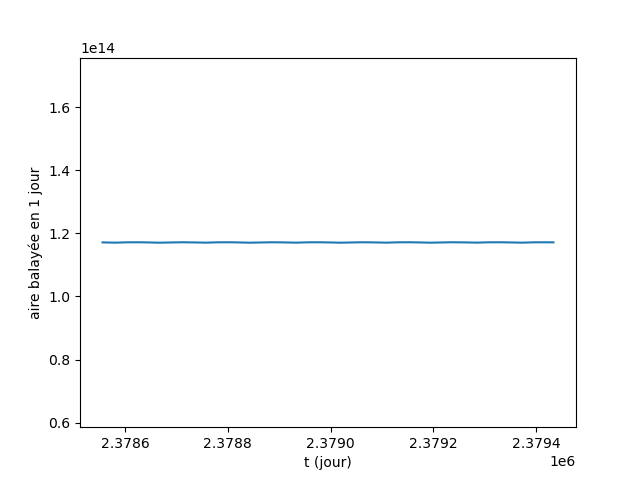

In [12]:
fig = plt.figure("Calcul de l'aire balayée")

o = "mercury"
p = 88
aire = []
t = []
x = []
y = []
z = []

for i in range(2378556,2378556+10*p,1): # On balaye ici dix périodes
    a,b,c = eph.position(o,i)
    d,e,f = eph.position("sun",i)
    x.append(a-d)
    y.append(b-e)
    z.append(c-f)
    t.append(i)
t = t[:-1] # Il y a n intervalles (donc n aires calculées) et n+1 instants, on élimine donc le dernier de la liste t
for i in range(len(t)): # Calcul de l'aire du triangle Soleil - Mercure jour j - Mercure jour j+1 pour tous les j
    aire.append(0.5*((x[i]*y[i+1]-x[i+1]*y[i])**2+(y[i]*z[i+1]-y[i+1]*z[i])**2+(z[i]*x[i+1]-z[i+1]*x[i])**2)**0.5)
        
plt.plot(t,aire)
plt.xlabel("t (jour)")
plt.ylabel("aire balayée en 1 jour")
plt.ylim([0.5*aire[0],1.5*aire[0]]) # On limite l'affichage entre 0.5 et 1.5 fois la valeur de l'aire en 1 point.
                                    # Ceci permet d'avoir cette courbe et la courbe de vitesse à des échelles comparables
                                    # Sans cela, les petites variations de l'aire sont visibles de l'ordre de 1 pour 1000
plt.show()

On peut remarquer que l'aire balayée reste constante bien que la vitesse varie beaucoup. On accède à la vitesse en utilisant la méthode **position_and_velocity**

<IPython.core.display.Javascript object>


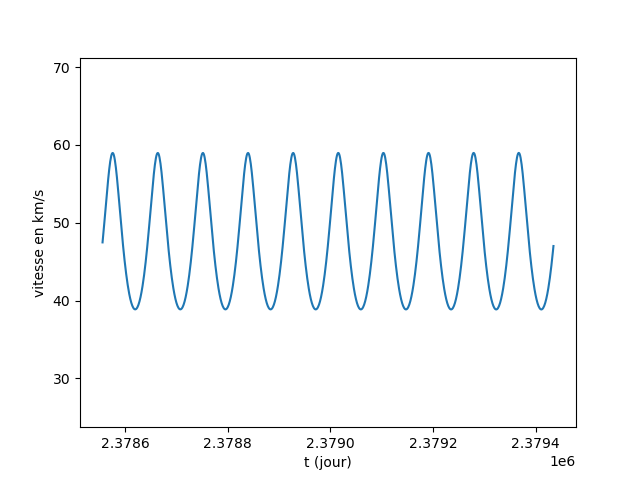

In [13]:
fig = plt.figure("Evolution de la vitesse orbitale au cours du temps: cas de Mercure")

o = "mercury"
p = 88

t = []
x = []
y = []
z = []
vit = []
for i in range(2378556,2378556+10*p,1): 
    a,b = eph.position_and_velocity(o,i) # renvoie deux listes de 3 éléments. La liste des positions et celle des vitesses
    v = (b[0]**2+b[1]**2+b[2]**2)**0.5/86400 # norme de la vitesse en km/s -en km/jour dans les données d'où le 86400-

    t.append(i)
    vit.append(v)
        
plt.plot(t,vit)
plt.xlabel("t (jour)")
plt.ylabel("vitesse en km/s")
plt.ylim([0.5*vit[0],1.5*vit[0]])
plt.show()

# Exercice
4. Copier puis modfier les programmes ci-dessus afin de tracer la courbe aire = f(t) pour mars avec un point tous les 10 jours.
5. Faire de même pour la vitesse en fonction du temps.

In [ ]:
# question 4


In [39]:
# question 5


Nous allons maintenant passer à la troisième loi de Kepler ou loi des périodes. Pour cela nous allons tracer $T^2$ en fonction de $a^3$ pour les planètes du système solaire puis vérifier qu'un modèle mathématique linéaire décrit bien ce qui est obserrvé. 

On obtient une masse solaire de 1.994E+30 kg quand la valeur tabulée est de 1.989E+30 kg


<IPython.core.display.Javascript object>


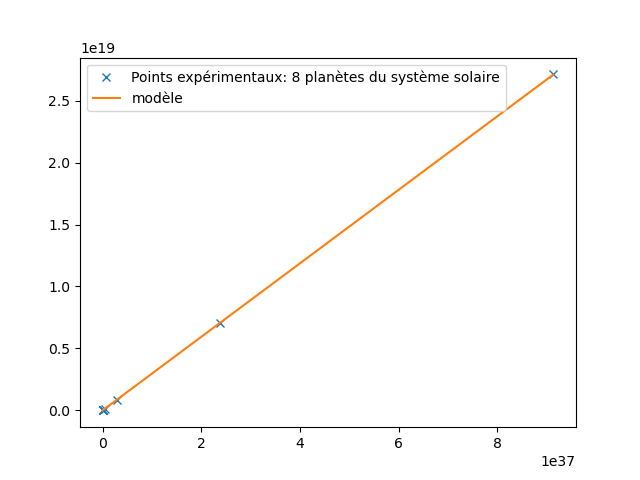

In [14]:
periodes = [87.969256, 224.6997056, 365.256363051, 686.979852, 4332.589, 10759.23, 30685.4, 60266] # en jours
dist = [57.91e6, 108.2e6, 149.6e6, 227.9e6, 778.3e6, 1429e6, 2875e6, 4504e6] # en km

T = []
for val in periodes:
    T.append(val*86400) # périodes en s

a = []
for val in dist:
    a.append(val*1000) # distances en m
    
x = []
y = []
for i in range(len(a)): # construction des listes de a^3 et de T^2
    x.append(a[i]**3)
    y.append(T[i]**2)
    
def lin(x,a): # modèle linéaire
    return(a*x)

params,cov = curve_fit(lin, x, y)

ymod = []
for val in x:
    ymod.append(lin(val,*params))

G = 6.6742e-11
cte = 4*pi**2/G
m = cte / params[0]
print("On obtient une masse solaire de {:.3E} kg quand la valeur tabulée est de 1.989E+30 kg".format(m)) 

fig = plt.figure("exemple de vérification de la troisieme loi de Kepler")
plt.plot(x,y,"x",label="Points expérimentaux: 8 planètes du système solaire")
plt.plot(x,ymod,label="modèle")
plt.legend()
plt.show()

# Exercice
6. Exploiter les données sur les satellites de Jupiter ci-dessous en réutilisant et en adaptant le code précédent afin de déterminer la masse de Jupiter.

<IPython.core.display.Javascript object>


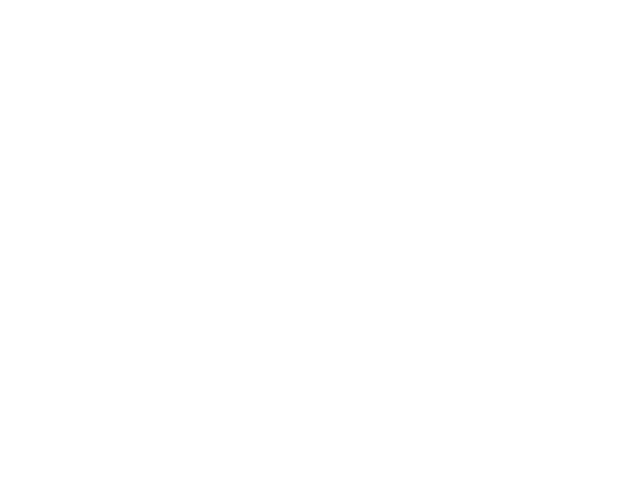

In [15]:
# question 6
periodes = [0.29478, 0.29526, 0.49818, 0.6745, 1.7691, 3.5512, 7.1545, 16.689, 238.72, 250.56, 259.22, 259.65] # jours
dist = [128e3, 129e3, 181e3, 222e3, 422e3, 671e3, 1070e3, 1883e3, 11094e3, 11480e3, 11720e3, 11737e3] # km
fig = plt.figure("troisieme loi de Kepler: exemple 2")


Enfin, on peut faire quelques approximations comme assimiler les trajectoires des planètes à des cercles de rayon la distance moyenne entre le soleil et le corps considéré. On a donc $\frac{T^2}{a_{moy}^3} = cte$ et $v_{moy} = \frac {2 \pi a_{moy}}{T}$ d'où $v_{moy} = \frac{k}{\sqrt{a_{moy}}}$ avec k une constante. 

<IPython.core.display.Javascript object>


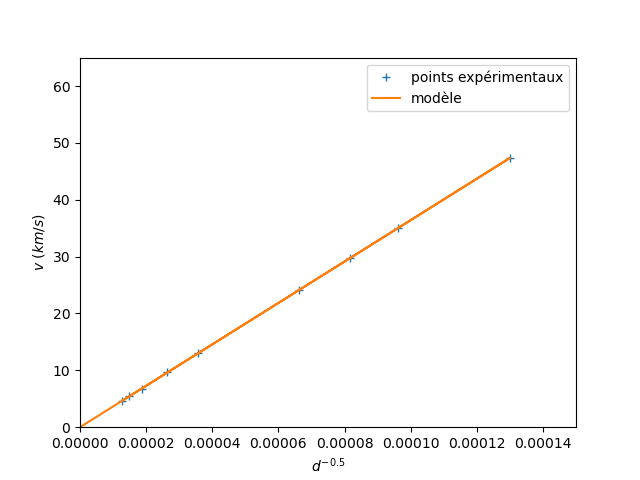

In [16]:
fig = plt.figure("Troisième loi de Kepler: étude de la vitesse orbitale")
objets = ["mercury","venus", "earthmoon", "mars","jupiter","saturn","uranus","neptune","pluto"]
periodes = [88, 225, 365, 687, 4333, 10759, 30685, 60266, 90638]

p = 500
dist = []
vit = []
for j in range(len(objets)):
    o = objets[j]
    d2 = 0
    V = 0
    n = 0
    for i in range(2378556,2378556+periodes[j],10): #1er mars 1800 à 1er mars 1800 + période
        n = n+1
        a,b = eph.position_and_velocity(o,i)
        d,e,f = eph.position("sun",i)
        v = (b[0]**2+b[1]**2+b[2]**2)**0.5
        d2 = d2 + ((a[0]-d)**2+(a[1]-e)**2+(a[2]-f)**2)**0.5
        V = V + v[0]/86400 # vitesse en km/s
    dist.append(d2[0]/n) # 1 distance moyenne par corps
    vit.append(V/n) # 1 vitesse moyenne par corps


dist2 = [] # construction de la liste des 1/d**0.5
for val in dist:
    dist2.append(1/val**0.5)
        
def lin(x,a):
    return (a*x)

params, cov = curve_fit(lin,dist2,vit)

ymod = [0] # construction du modèle en ajoutant le point (0,0)
xmod = [0]
for val in dist2:
    ymod.append(lin(val,*params))
    xmod.append(val)

plt.plot(dist2,vit,"+",label="points expérimentaux")
plt.plot(xmod,ymod,label = "modèle")
plt.ylim([0,65])
plt.xlim([0,0.000150])
plt.xlabel(r"$d^{-0.5}$")
plt.ylabel(r"$v\ (km/s)$")
plt.legend()
plt.show()

# Exercice
7. Exploiter les données ci-dessous en réutilisant et en adaptant le code précédent.

<IPython.core.display.Javascript object>


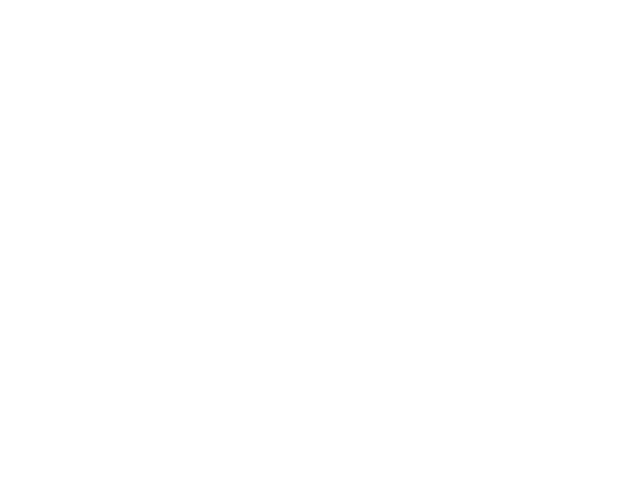

In [17]:
# question 7
fig = plt.figure("Troisième loi de Kepler: étude des vitesses orbitales2")
planetes =["mercure","venus","terre","mars","jupiter","saturne","uranus","neptune"]
d = [0.38, 0.72, 1.00, 1.52, 5.21, 9.54, 19.18, 30.11] # UA
v = [48.92, 35.02, 29.78, 24.07, 13.05, 9.64, 6.81, 5.43] # km/s


<p style="text-align:justify;"><span style="float:left;"><a href="./pythonterm6.ipynb" > page précédente </a></span> </p>
